<a href="https://colab.research.google.com/github/Sk8133/STML-2424/blob/main/project_sml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv(r"/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [60]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [61]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [62]:
df.duplicated().sum()

2

In [64]:
df.drop_duplicates(inplace=True)

In [63]:
df.duplicated().sum()

2

In [65]:
df.shape

(299, 9)

In [66]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Year,299.000000,2013.615385,2.896868,2003.000000,2012.000000,2014.000000,2016.000000,2018.000000
Selling_Price,299.000000,4.589632,4.984240,0.100000,0.850000,3.510000,6.000000,35.000000
Present_Price,299.000000,7.541037,8.567887,0.320000,1.200000,6.100000,9.840000,92.600000
Kms_Driven,299.000000,36916.752508,39015.170352,500.000000,15000.000000,32000.000000,48883.500000,500000.000000
Owner,299.000000,0.043478,0.248720,0.000000,0.000000,0.000000,0.000000,3.000000


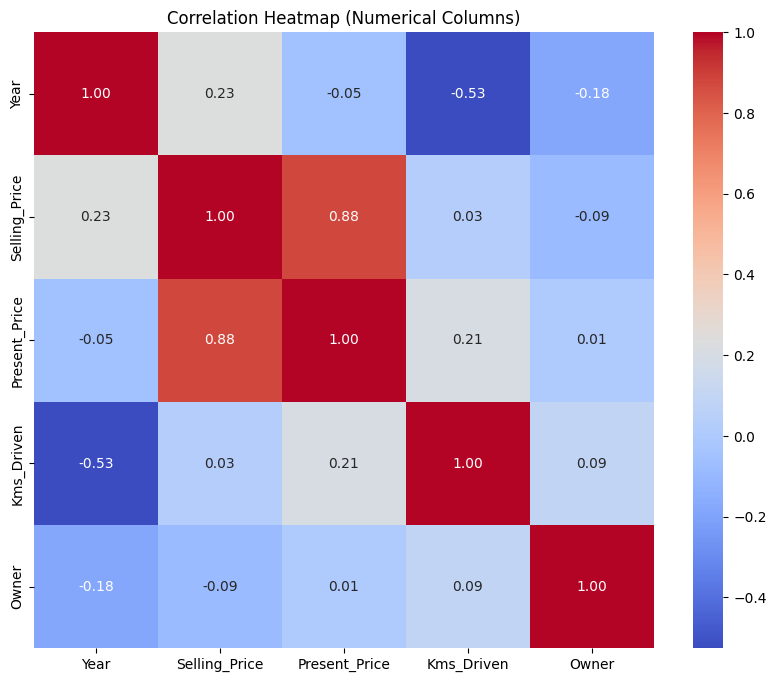

In [67]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

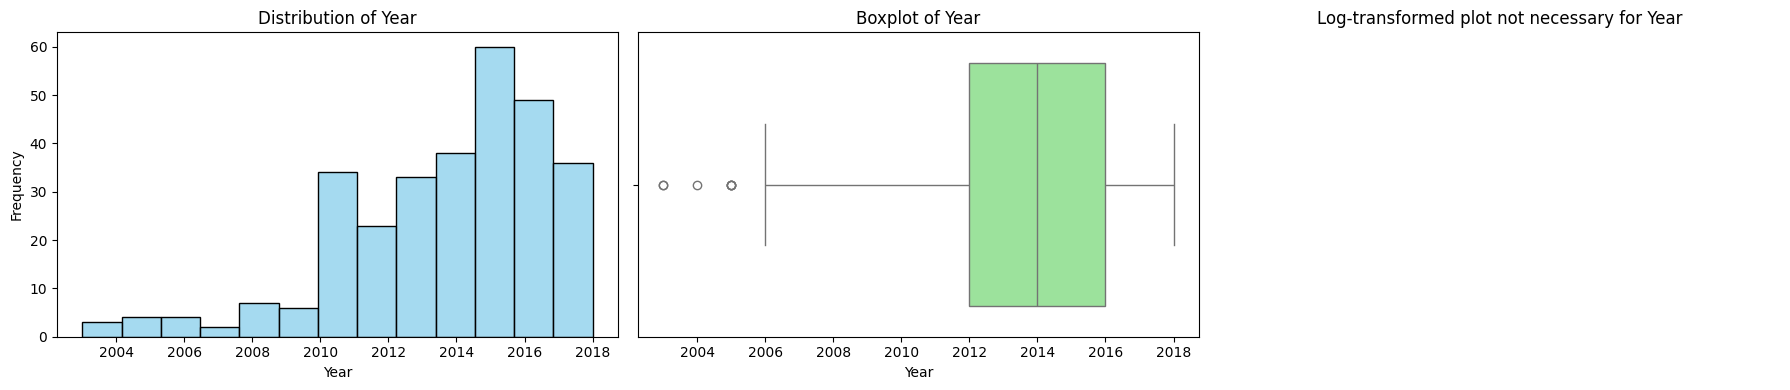

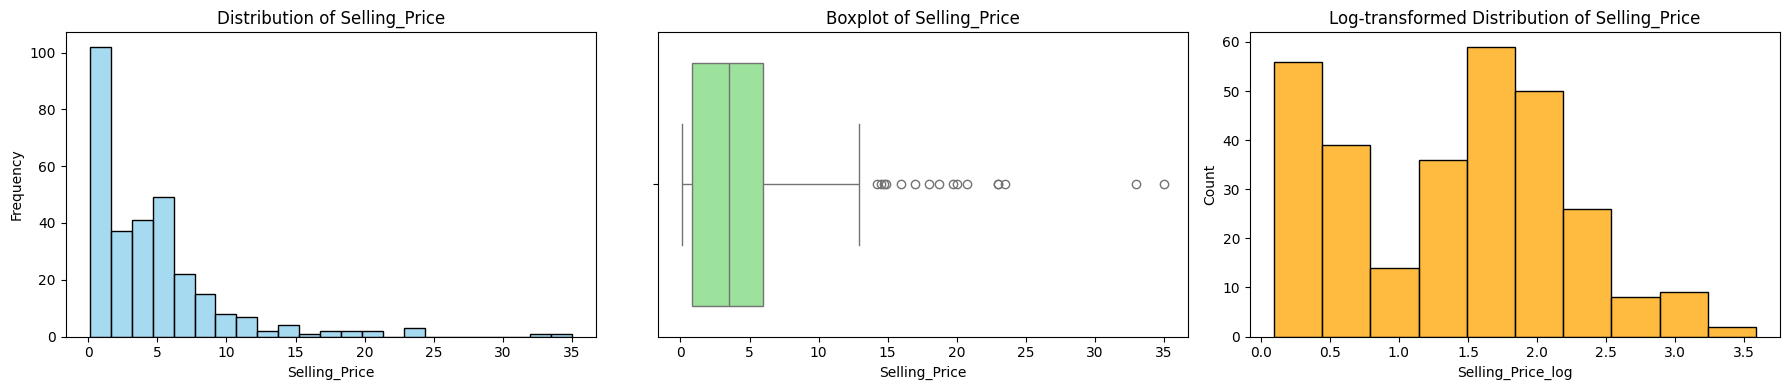

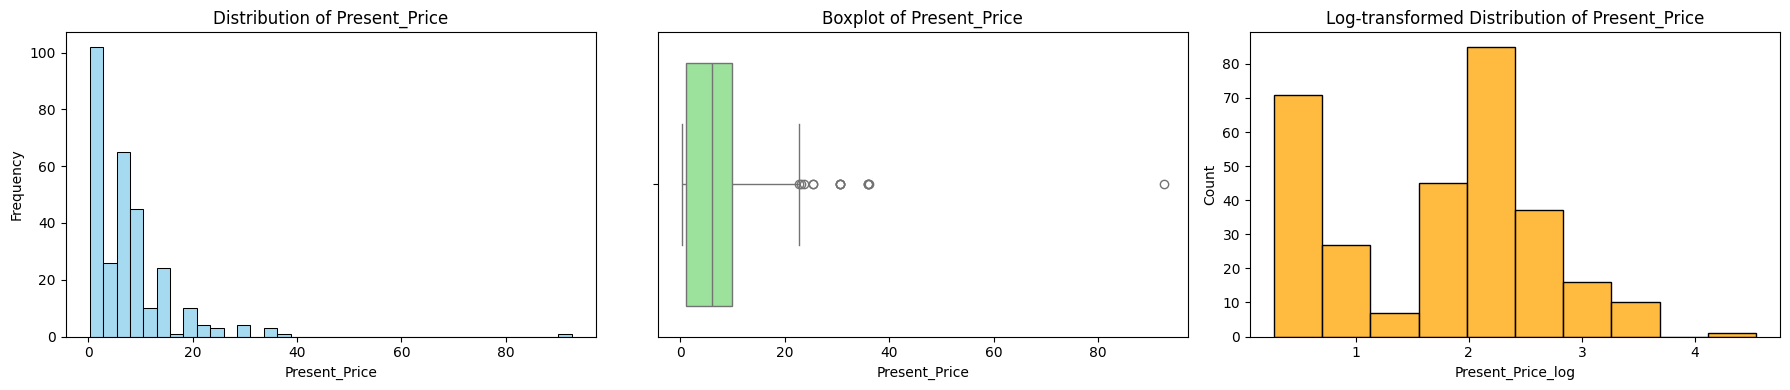

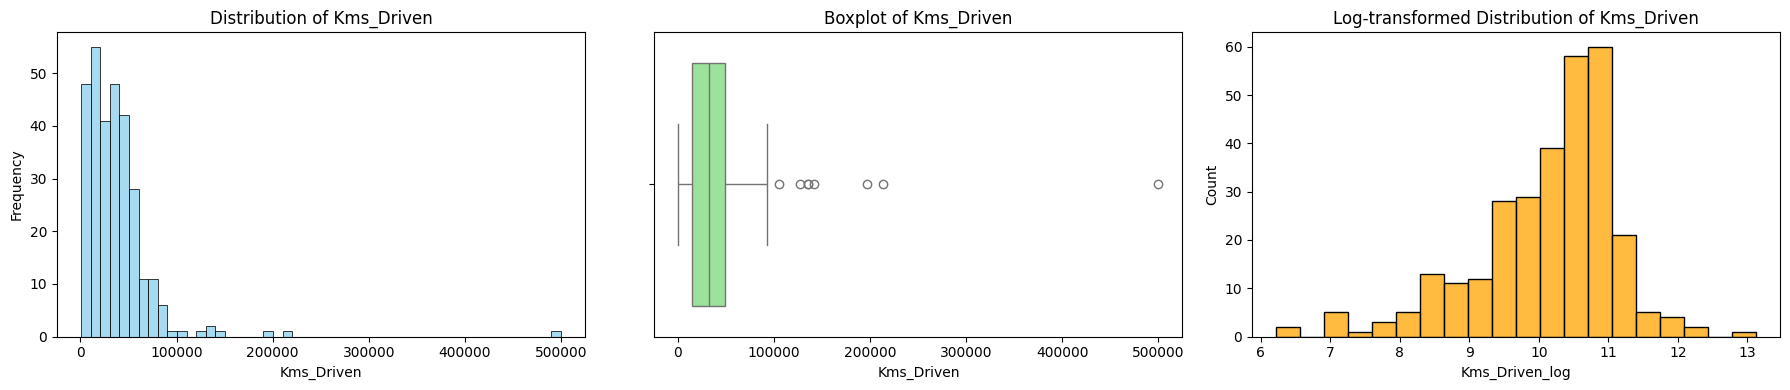

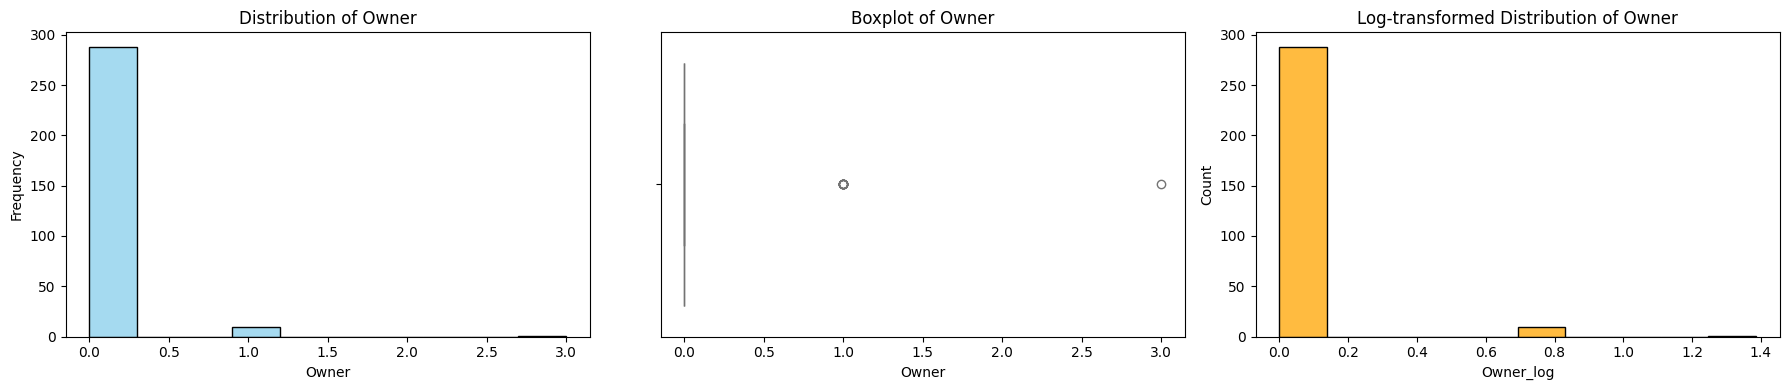

In [68]:
for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=df[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if df[column].skew() > 1:
        df[column+'_log'] = np.log1p(df[column])
        sns.histplot(df[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

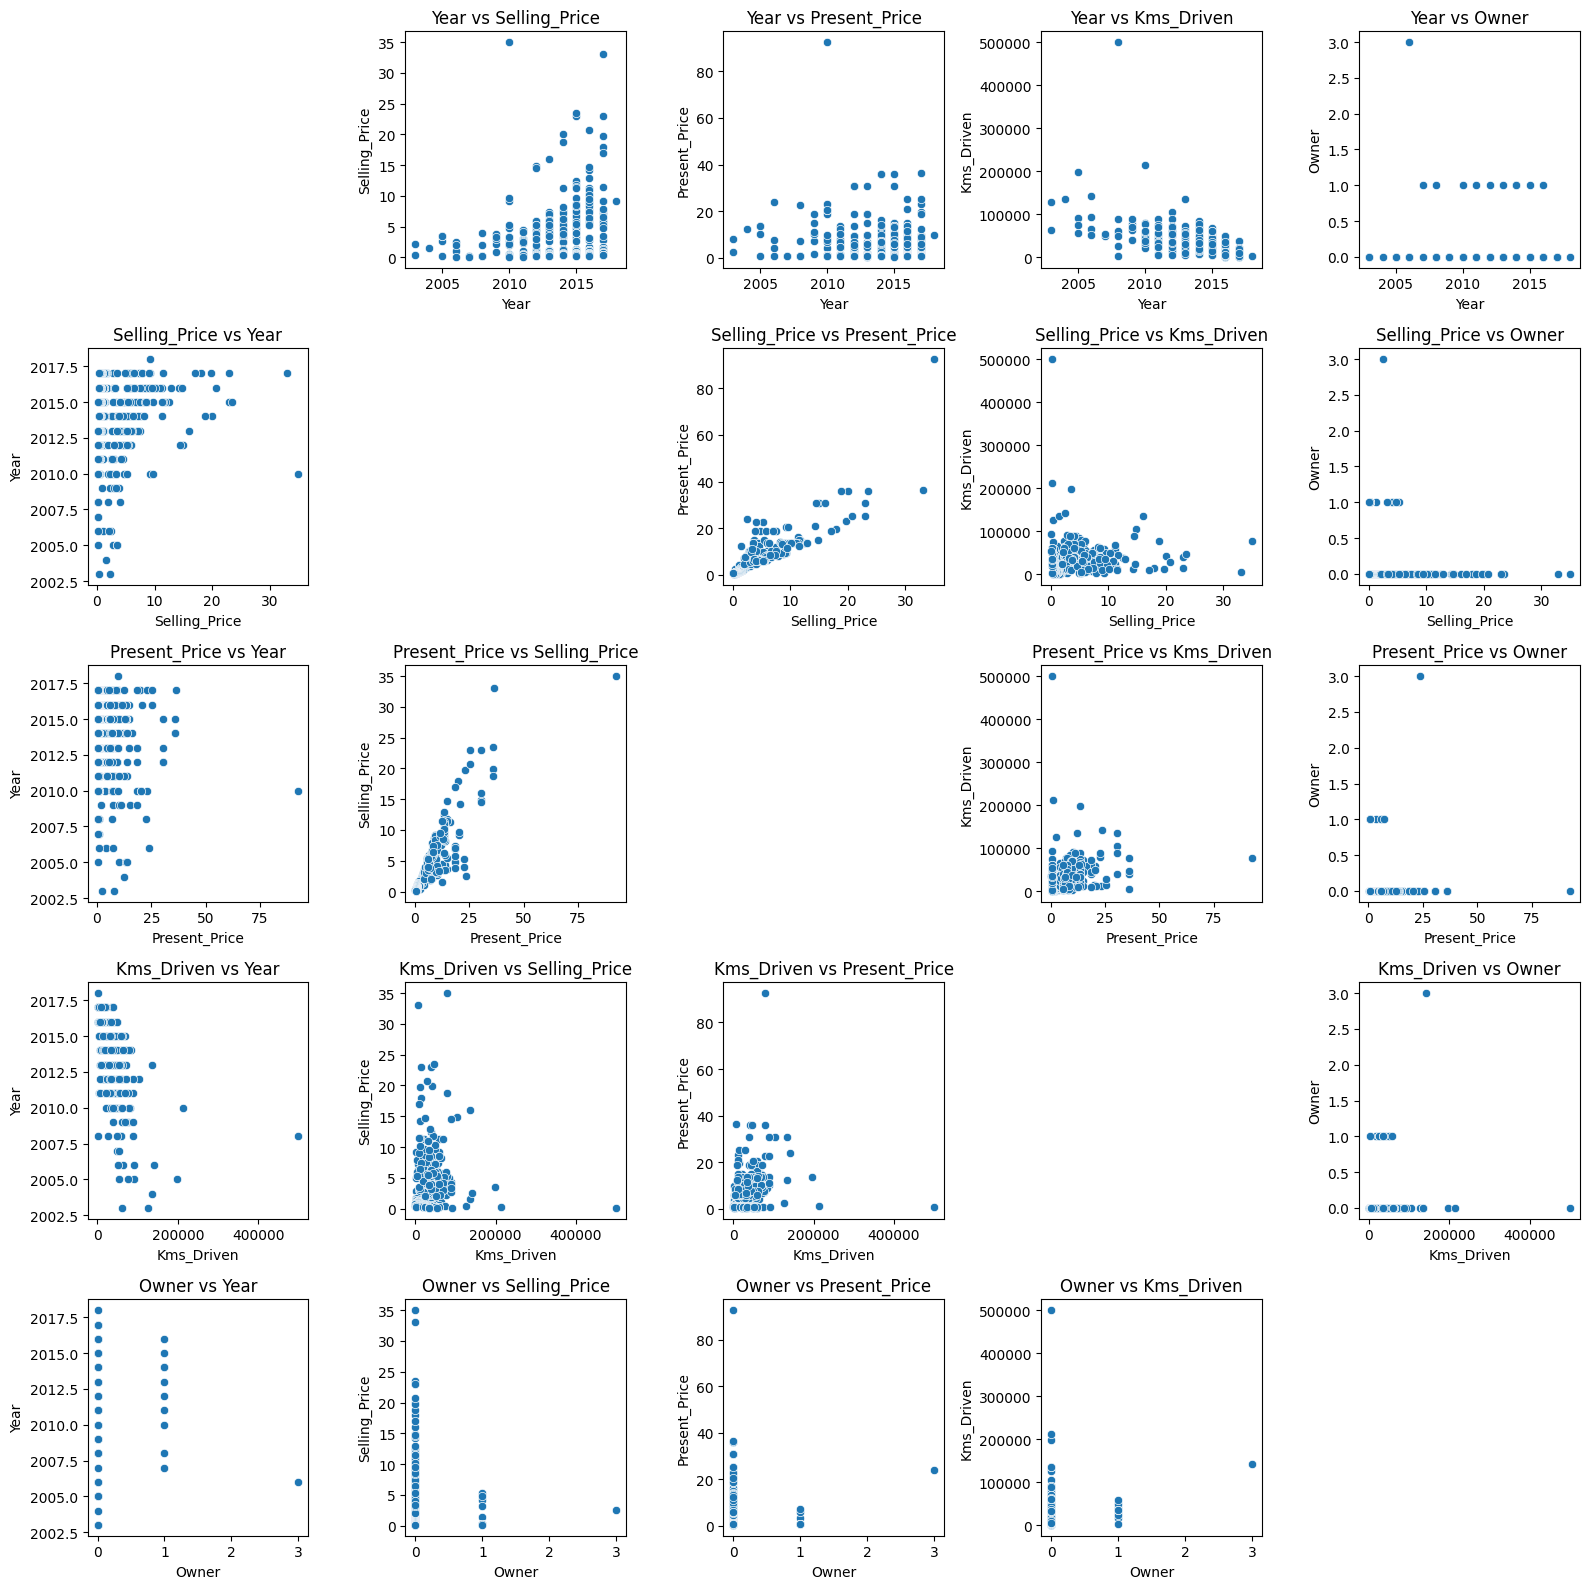

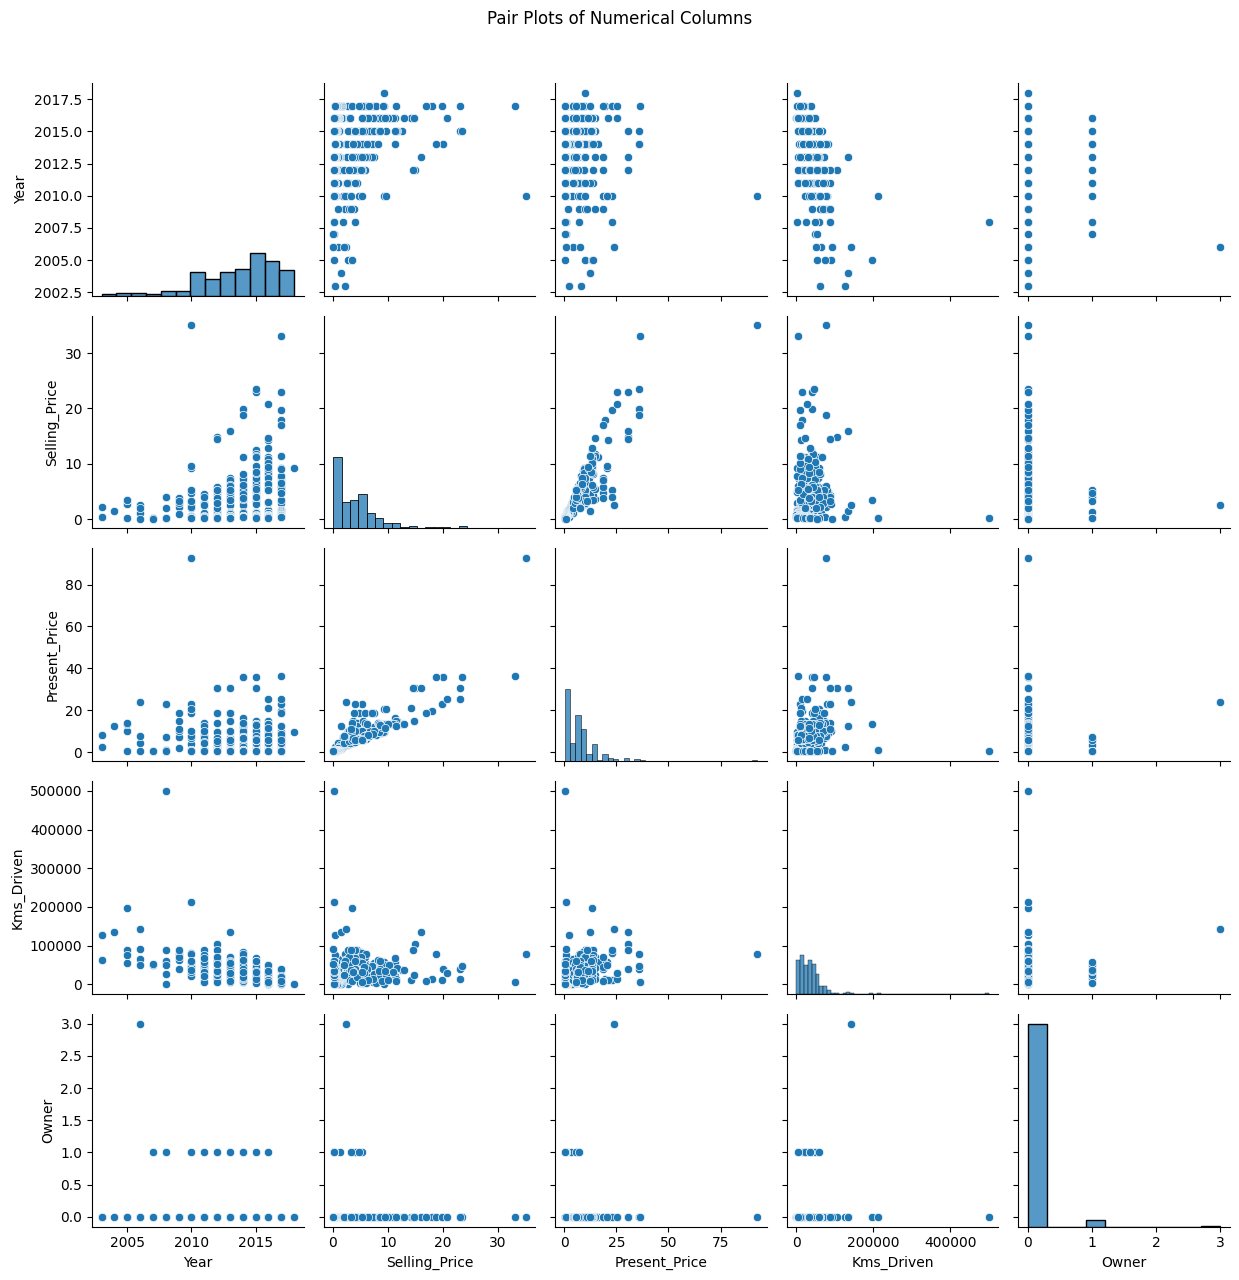

In [69]:
def scatter_plots(df, numerical_columns):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i, j], x=df[numerical_columns[i]], y=df[numerical_columns[j]])
                axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i, j].set_xlabel(numerical_columns[i])
                axes[i, j].set_ylabel(numerical_columns[j])
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
def pair_plots(df, numerical_columns):
    pair_plot = sns.pairplot(df[numerical_columns])
    pair_plot.fig.suptitle('Pair Plots of Numerical Columns', y=1.02)
    plt.tight_layout()
    plt.show()
scatter_plots(df, numerical_columns)
pair_plots(df, numerical_columns)

In [70]:
if 'Car_Name' in df.columns:
    df.drop('Car_Name', inplace=True, axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [71]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Fuel_Type':
['Petrol' 'Diesel' 'CNG']

Unique values in 'Seller_Type':
['Dealer' 'Individual']

Unique values in 'Transmission':
['Manual' 'Automatic']



In [72]:
df1 = pd.get_dummies(df, columns=object_columns)

In [73]:
df1

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Selling_Price_log,Present_Price_log,Kms_Driven_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,1.470176,1.885553,10.203629,0.0,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000,0,1.749200,2.355178,10.668979,0.0,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900,0,2.110213,2.384165,8.839422,0.0,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200,0,1.348073,1.638997,8.556606,0.0,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450,0,1.722767,2.063058,10.656106,0.0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2.351375,2.533697,10.433792,0.0,False,True,False,True,False,False,True
297,2015,4.00,5.90,60000,0,1.609438,1.931521,11.002117,0.0,False,False,True,True,False,False,True
298,2009,3.35,11.00,87934,0,1.470176,2.484907,11.384353,0.0,False,False,True,True,False,False,True
299,2017,11.50,12.50,9000,0,2.525729,2.602690,9.105091,0.0,False,True,False,True,False,False,True


In [74]:
df1.shape

(299, 16)

In [75]:
y=df1['Selling_Price']
y


,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [76]:
X = df1.drop(['Selling_Price'],axis=1)
X

,Year,Present_Price,Kms_Driven,Owner,Selling_Price_log,Present_Price_log,Kms_Driven_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,1.470176,1.885553,10.203629,0.0,False,False,True,True,False,False,True
1,2013,9.54,43000,0,1.749200,2.355178,10.668979,0.0,False,True,False,True,False,False,True
2,2017,9.85,6900,0,2.110213,2.384165,8.839422,0.0,False,False,True,True,False,False,True
3,2011,4.15,5200,0,1.348073,1.638997,8.556606,0.0,False,False,True,True,False,False,True
4,2014,6.87,42450,0,1.722767,2.063058,10.656106,0.0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,2.351375,2.533697,10.433792,0.0,False,True,False,True,False,False,True
297,2015,5.90,60000,0,1.609438,1.931521,11.002117,0.0,False,False,True,True,False,False,True
298,2009,11.00,87934,0,1.470176,2.484907,11.384353,0.0,False,False,True,True,False,False,True
299,2017,12.50,9000,0,2.525729,2.602690,9.105091,0.0,False,True,False,True,False,False,True


In [79]:
# Replace boolean values with integers for Fuel Type
X['Fuel_Type_CNG'] = X['Fuel_Type_CNG'].astype(int)
X['Fuel_Type_Petrol'] = X['Fuel_Type_Petrol'].astype(int)
X['Fuel_Type_Diesel'] = X['Fuel_Type_Diesel'].astype(int)

# Replace boolean values with integers for Selling Type
# Check if the column name is 'Seller_Type' instead of 'Selling_type'
X['Seller_Type_Dealer'] = X['Seller_Type_Dealer'].astype(int)  # Changed 'Selling_type' to 'Seller_Type'
X['Seller_Type_Individual'] = X['Seller_Type_Individual'].astype(int)  # Changed 'Selling_type' to 'Seller_Type'


# Replace boolean values with integers for Transmission
X['Transmission_Automatic'] = X['Transmission_Automatic'].astype(int)
X['Transmission_Manual'] = X['Transmission_Manual'].astype(int)

In [80]:
X.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Selling_Price_log',
       'Present_Price_log', 'Kms_Driven_log', 'Owner_log', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Dealer',
       'Seller_Type_Individual', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [82]:
# Correct the column name from 'Selling_type_Dealer' to 'Seller_Type_Dealer'
# and remove 'Driven_kms_log' if it does not exist or replace it with the correct name if renamed
X = X.drop(['Selling_Price_log', 'Present_Price','Seller_Type_Dealer', 'Owner', 'Fuel_Type_CNG'],axis=1) # Changed 'Selling_type_Dealer' to 'Seller_Type_Dealer' and removed 'Driven_kms_log'
X

,Year,Kms_Driven,Present_Price_log,Kms_Driven_log,Owner_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,27000,1.885553,10.203629,0.0,0,1,0,0,1
1,2013,43000,2.355178,10.668979,0.0,1,0,0,0,1
2,2017,6900,2.384165,8.839422,0.0,0,1,0,0,1
3,2011,5200,1.638997,8.556606,0.0,0,1,0,0,1
4,2014,42450,2.063058,10.656106,0.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,2016,33988,2.533697,10.433792,0.0,1,0,0,0,1
297,2015,60000,1.931521,11.002117,0.0,0,1,0,0,1
298,2009,87934,2.484907,11.384353,0.0,0,1,0,0,1
299,2017,9000,2.602690,9.105091,0.0,1,0,0,0,1


In [84]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'Kms_Driven' is the correct column name instead of 'Driven_kms'
# and assuming you want to drop specified columns
non_boolean_numerical_features = ['Year', 'Kms_Driven']
# Update the list of numerical features to reflect the correct column names present in the DataFrame.


# Keep those column and drop other unwanted columns
X = X[['Year','Kms_Driven','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual','Transmission_Automatic']]

# Apply MinMaxScaler to the selected numerical features
scaler = MinMaxScaler()
X[non_boolean_numerical_features] = scaler.fit_transform(X[non_boolean_numerical_features])

<ipython-input-84-3334fc3d3016>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
X

,Year,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Transmission_Automatic
0,0.733333,0.053053,0,1,0,1,0
1,0.666667,0.085085,1,0,0,1,0
2,0.933333,0.012813,0,1,0,1,0
3,0.533333,0.009409,0,1,0,1,0
4,0.733333,0.083984,1,0,0,1,0
...,...,...,...,...,...,...,...
296,0.866667,0.067043,1,0,0,1,0
297,0.800000,0.119119,0,1,0,1,0
298,0.400000,0.175043,0,1,0,1,0
299,0.933333,0.017017,1,0,0,1,0


In [86]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X_train

,Year,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Transmission_Automatic
6,0.800000,0.036629,0,1,0,1,0
185,0.333333,0.002803,0,1,1,0,1
187,0.666667,0.063063,0,1,1,1,0
148,0.466667,0.089089,0,1,1,1,0
31,0.533333,0.107508,0,1,0,1,0
...,...,...,...,...,...,...,...
190,0.333333,0.119119,0,1,1,1,0
72,0.666667,0.111113,0,1,0,1,0
108,0.866667,0.035035,0,1,1,1,0
272,0.800000,0.054254,0,1,0,1,0


In [89]:
y_train

,Selling_Price
6,6.75
185,0.25
187,0.25
148,0.52
31,2.35
...,...
190,0.20
72,7.45
108,1.20
272,7.50


In [90]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)

In [94]:
x_train = train.iloc[:, :20].values
x_test = test.iloc[:, :20].values

In [95]:
y_train = train['Selling_Price'].values
y_test = test['Selling_Price'].values

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

In [97]:
from sklearn.svm import SVR
model_lr =  LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_train = model_lr.predict(X_train)
y_pred_test= model_lr.predict(X_test)

print(f'train data MSE score lr: {mean_squared_error(y_train,y_pred_train )}')
print(f'train data MAE score lr: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score lr: {root_mean_squared_error(y_train,y_pred_train )}')

print()
print(f'test data MSE score lr: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score lr: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score lr: {root_mean_squared_error(y_test, y_pred_test)}')
print()

train data MSE score lr: 24.71425285365689
train data MAE score lr: 3.321202997269291
train data RMSE score lr: 4.971343163940395

test data MSE score lr: 24.15687408073206
test data MAE score lr: 3.708569499536788
test data RMSE score lr: 4.91496430106385



In [98]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

In [99]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(X_train, y_train)
y_pred_train = model_svr.predict(X_train)
y_pred_test= model_svr.predict(X_test)

print(f'train data MSE score SVR: {mean_squared_error(y_train,y_pred_train )}')
print(f'train data MAE score SVR: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score SVR: {root_mean_squared_error(y_train,y_pred_train )}')



print()
print(f'test data MSE score SVR: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score SVR: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score SVR: {root_mean_squared_error(y_test, y_pred_test)}')
print()

train data MSE score SVR: 25.43945281665401
train data MAE score SVR: 3.1392303314357686
train data RMSE score SVR: 5.043753841798191

test data MSE score SVR: 24.3023518183043
test data MAE score SVR: 3.4810089334214935
test data RMSE score SVR: 4.929741556948427



In [100]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, y_train)

Lasso()

In [101]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, y_train)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)


y_pred_lasso = model_lasso.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

y_pred_lasso1 = model_lasso.predict(X_train)
y_pred_ridge1 = model_ridge.predict(X_train)

print(f'test data MSE score lasso: {mean_squared_error(y_test,y_pred_lasso)}')
print(f'test data MAE score lasso: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'test data RMSE score lasso: {root_mean_squared_error(y_test, y_pred_lasso)}')
print()
print(f'train data MSE score lasso: {mean_squared_error(y_train,y_pred_lasso1)}')
print(f'train data MAE score lasso: {mean_absolute_error(y_train,y_pred_lasso1 )}')
print(f'train data RMSE score lasso: {root_mean_squared_error(y_train,y_pred_lasso1)}')
print()

test data MSE score lasso: 22.61319686224564
test data MAE score lasso: 3.482063458856346
test data RMSE score lasso: 4.755333517456545

train data MSE score lasso: 25.307321261882667
train data MAE score lasso: 3.3684364769524335
train data RMSE score lasso: 5.030638255915711



In [102]:
print(f'train data MSE score ridge: {mean_squared_error(y_train,y_pred_ridge1)}')
print(f'train data MAE score ridge: {mean_absolute_error(y_train,y_pred_ridge1 )}')
print(f'train data RMSE score ridge: {root_mean_squared_error(y_train,y_pred_ridge1)}')
print()
print(f'test data MSE score ridge: {mean_squared_error(y_test,y_pred_ridge)}')
print(f'test data MAE score ridge: {mean_absolute_error(y_test,y_pred_ridge )}')
print(f'test data RMSE score ridge: {root_mean_squared_error(y_test,y_pred_ridge)}')
print()

train data MSE score ridge: 24.726334886224226
train data MAE score ridge: 3.330191907728817
train data RMSE score ridge: 4.972558183291999

test data MSE score ridge: 24.05737203265984
test data MAE score ridge: 3.68722265440338
test data RMSE score ridge: 4.904831498905935



In [103]:
from sklearn.linear_model import Lasso, Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

Ridge()

In [104]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error

y_pred_knn = model_knn.predict(X_test)
y_pred_knn1 = model_knn.predict(X_train)

mse = mean_squared_error(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)
rmse = root_mean_squared_error(y_test, y_pred_knn)

mse1=mean_squared_error(y_train, y_pred_knn1)
mae1=mean_absolute_error(y_train, y_pred_knn1)
rmse1=root_mean_squared_error(y_train, y_pred_knn1)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print()
print(f"Mean Squared Error: {mse1}")
print(f"Mean Absolute Error: {mae1}")
print(f"Root Mean Squared Error: {rmse1}")

Mean Squared Error: 26.814137666666664
Mean Absolute Error: 3.8206333333333333
Root Mean Squared Error: 5.178236926470888

Mean Squared Error: 20.998649790794975
Mean Absolute Error: 3.1173807531380757
Root Mean Squared Error: 4.5824283726857065


In [106]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([10, 20, 30, 40])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def bootstrap_metrics(model, x_train, y_train, x_test, y_test, n_iterations=100):
    mse_values = []
    mae_values = []
    rmse_values = []

    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

model_lr = LinearRegression()

mse_lr, mae_lr, rmse_lr = bootstrap_metrics(model_lr, X_train, y_train, X_test, y_test)

print(f"Bootstrapped MSE for Linear Regression: {mse_lr.mean()}")
print(f"Confidence intervals for Linear Regression MSE: {np.percentile(mse_lr, [2.5, 97.5])}")
print(f"Bootstrapped MAE for Linear Regression: {mae_lr.mean()}")
print(f"Confidence intervals for Linear Regression MAE: {np.percentile(mae_lr, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for Linear Regression: {rmse_lr.mean()}")
print(f"Confidence intervals for Linear Regression RMSE: {np.percentile(rmse_lr, [2.5, 97.5])}")

Bootstrapped MSE for Linear Regression: 28.0
Confidence intervals for Linear Regression MSE: [  0. 400.]
Bootstrapped MAE for Linear Regression: 2.000000000000002
Confidence intervals for Linear Regression MAE: [ 0. 20.]
Bootstrapped RMSE for Linear Regression: 2.000000000000002
Confidence intervals for Linear Regression RMSE: [ 0. 20.]


In [107]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([10, 20, 30, 40])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def bootstrap_metrics(model, x_train, y_train, x_test, y_test, n_iterations=100):
    mse_values = []
    mae_values = []
    rmse_values = []

    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

model_lasso = Lasso()

mse_lasso, mae_lasso, rmse_lasso = bootstrap_metrics(model_lasso, X_train, y_train, X_test, y_test)

print(f"Bootstrapped MSE for Lasso Regression: {mse_lasso.mean()}")
print(f"Confidence intervals for Lasso Regression MSE: {np.percentile(mse_lasso, [2.5, 97.5])}")
print(f"Bootstrapped MAE for Lasso Regression: {mae_lasso.mean()}")
print(f"Confidence intervals for Lasso Regression MAE: {np.percentile(mae_lasso, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for Lasso Regression: {rmse_lasso.mean()}")
print(f"Confidence intervals for Lasso Regression RMSE: {np.percentile(rmse_lasso, [2.5, 97.5])}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

Bootstrapped MSE for Lasso Regression: 27.512426658163267
Confidence intervals for Lasso Regression MSE: [  0. 400.]
Bootstrapped MAE for Lasso Regression: 2.5564285714285715
Confidence intervals for Lasso Regression MAE: [ 0. 20.]
Bootstrapped RMSE for Lasso Regression: 2.5564285714285715
Confidence intervals for Lasso Regression RMSE: [ 0. 20.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00



In [108]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([10, 20, 30, 40])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def bootstrap_metrics(model, x_train, y_train, x_test, y_test, n_iterations=100):
    mse_values = []
    mae_values = []
    rmse_values = []

    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

model_knn = KNeighborsRegressor(n_neighbors=3)


mse_knn, mae_knn, rmse_knn = bootstrap_metrics(model_knn, X_train, y_train, X_test, y_test)


print(f"Bootstrapped MSE for KNN Regression: {mse_knn.mean()}")
print(f"Confidence intervals for KNN Regression MSE: {np.percentile(mse_knn, [2.5, 97.5])}")
print(f"Bootstrapped MAE for KNN Regression: {mae_knn.mean()}")
print(f"Confidence intervals for KNN Regression MAE: {np.percentile(mae_knn, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for KNN Regression: {rmse_knn.mean()}")
print(f"Confidence intervals for KNN Regression RMSE: {np.percentile(rmse_knn, [2.5, 97.5])}")


Bootstrapped MSE for KNN Regression: 103.44444444444441
Confidence intervals for KNN Regression MSE: [  0.         341.94444444]
Bootstrapped MAE for KNN Regression: 8.566666666666666
Confidence intervals for KNN Regression MAE: [ 0.         18.41666667]
Bootstrapped RMSE for KNN Regression: 8.566666666666666
Confidence intervals for KNN Regression RMSE: [ 0.         18.41666667]


In [109]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([10, 20, 30, 40])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def bootstrap_metrics(model, x_train, y_train, x_test, y_test, n_iterations=100):
    mse_values = []
    mae_values = []
    rmse_values = []

    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)


model_svm = SVR()


mse_svm, mae_svm, rmse_svm = bootstrap_metrics(model_svm, X_train, y_train, X_test, y_test)



print(f"Bootstrapped MSE for SVM Regression: {mse_svm.mean()}")
print(f"Confidence intervals for SVM Regression MSE: {np.percentile(mse_svm, [2.5, 97.5])}")
print(f"Bootstrapped MAE for SVM Regression: {mae_svm.mean()}")
print(f"Confidence intervals for SVM Regression MAE: {np.percentile(mae_svm, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for SVM Regression: {rmse_svm.mean()}")
print(f"Confidence intervals for SVM Regression RMSE: {np.percentile(rmse_svm, [2.5, 97.5])}")


Bootstrapped MSE for SVM Regression: 170.1168789823465
Confidence intervals for SVM Regression MSE: [ 79.47597773 400.        ]
Bootstrapped MAE for SVM Regression: 12.275489977132736
Confidence intervals for SVM Regression MAE: [ 8.91493005 20.        ]
Bootstrapped RMSE for SVM Regression: 12.275489977132736
Confidence intervals for SVM Regression RMSE: [ 8.91493005 20.        ]


In [110]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([10, 20, 30, 40])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def bootstrap_metrics(model, x_train, y_train, x_test, y_test, n_iterations=100):
    mse_values = []
    mae_values = []
    rmse_values = []

    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

model_lr = LinearRegression()
model_ridge = Ridge()

mse_ridge, mae_ridge, rmse_ridge = bootstrap_metrics(model_ridge, X_train, y_train, X_test, y_test)

print(f"Bootstrapped MSE for Ridge Regression: {mse_ridge.mean()}")
print(f"Confidence intervals for Ridge Regression MSE: {np.percentile(mse_ridge, [2.5, 97.5])}")
print(f"Bootstrapped MAE for Ridge Regression: {mae_ridge.mean()}")
print(f"Confidence intervals for Ridge Regression MAE: {np.percentile(mae_ridge, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for Ridge Regression: {rmse_ridge.mean()}")
print(f"Confidence intervals for Ridge Regression RMSE: {np.percentile(rmse_ridge, [2.5, 97.5])}")


Bootstrapped MSE for Ridge Regression: 24.5355247298534
Confidence intervals for Ridge Regression MSE: [  0. 400.]
Bootstrapped MAE for Ridge Regression: 2.2221302166141226
Confidence intervals for Ridge Regression MAE: [ 0. 20.]
Bootstrapped RMSE for Ridge Regression: 2.2221302166141226
Confidence intervals for Ridge Regression RMSE: [ 0. 20.]


In [111]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([10, 20, 30, 40])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def bootstrap_metrics(model, x_train, y_train, x_test, y_test, n_iterations=100):
    mse_values = []
    mae_values = []
    rmse_values = []

    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regression': KNeighborsRegressor(n_neighbors=3),
    'Lasso Regression': Lasso(),
    'SVM Regression': SVR()
}
results = {}
for name, model in models.items():
    mse, mae, rmse = bootstrap_metrics(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'mse': mse,
        'mae': mae,
        'rmse': rmse
    }

# Creating a single plot for all metrics
fig = go.Figure()

metric_labels = ['MSE', 'MAE', 'RMSE']
colors = {'Linear Regression': 'blue', 'KNN Regression': 'green', 'Lasso Regression': 'red', 'SVM Regression': 'purple'}

for name, result in results.items():
    fig.add_trace(go.Histogram(
        x=result['mse'],
        name=f'{name} - MSE',
        opacity=0.5,
        marker=dict(color=colors[name])
    ))
    fig.add_trace(go.Histogram(
        x=result['mae'],
        name=f'{name} - MAE',
        opacity=0.5,
        marker=dict(color=colors[name])
    ))
    fig.add_trace(go.Histogram(
        x=result['rmse'],
        name=f'{name} - RMSE',
        opacity=0.5,
        marker=dict(color=colors[name])
    ))

fig.update_layout(
    title="Bootstrapped Regression Model Metrics",
    xaxis_title="Error Metric Values",
    yaxis_title="Frequency",
    legend_title="Models and Metrics",
    barmode='overlay'
)

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

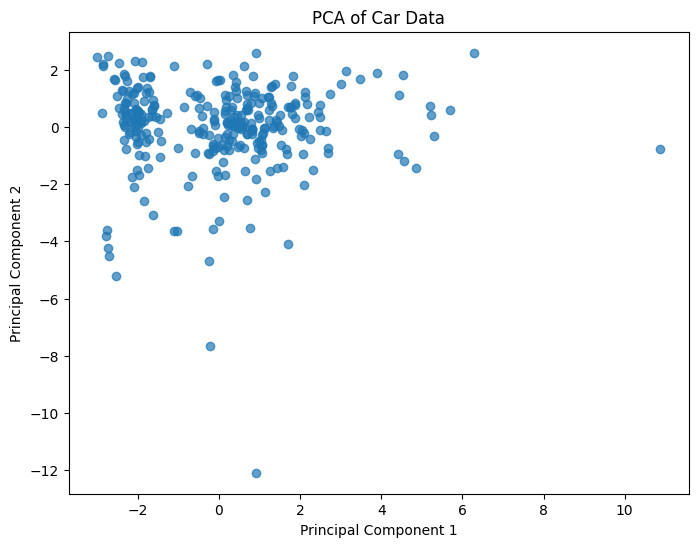

Explained variance by components: [0.40992816 0.26738087]


In [112]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
numerical_features = df1.select_dtypes(include=['number']).columns
data = df1[numerical_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Car Data')
plt.show()
print(f'Explained variance by components: {explained_variance}')